# 1. 보상을 최적화하기 위한 학습

- 강화 학습(Reinforcement Learning)
- 소프트웨어 에이전트 → 관측, 주어진 환경에서 행동 수행 → 보상 획득

# 2. 정책 탐색

- 정책(Policy) : 소프트웨어 에이전트가 행동을 결정하기 위해 사용하는 알고리즘
- 확률적 정책 → 무작위성 포함
- 정책 파라미터 → 확률, 각도 범위
- 유전 알고리즘(Genetic Algorithm) : 정책 공간 탐색
- 정책 그레이디언트(Policy Gradient) : 정책 파라미터에 대한 보상의 그레이디언트를 평가하여 높은 보상의 방향을 따르는 그레이디언트로 파라미터 수정

# 3. OpenAI Gym

- 다양한 시뮬레이션 환경 제공
- 고전적인 제어 이론 환경 포함

# 4. 신경망 정책

- 관측 입력 → 실행할 행동 출력
- 새로운 행동 탐험과 잘 할 수 있는 행동 활용 균형 유지

# 5. 행동 평가 : 신용 할당 문제

- 신용 할당 문제(Credit Assignment Problem) : 에이전트가 보상을 받았을 때 어떤 행동 덕분인지 알기 어려움
- 행동 이익(Action Advantage) : 다른 가능한 행동과 비교해서 각 행동이 얼마나 좋은지 나쁜지 추정

# 6. 정책 그레이디언트

- REINFORCE 알고리즘 : 높은 보상을 얻는 방향의 그레이디언트를 따르도록 정책 파라미터 최적화
- 액터-크리틱 알고리즘(Actor-Critic Algorithm)

# 7. 마르코프 결정 과정

- 마르코프 연쇄(Markov Chain) : 메모리가 없는 확률 과정
- 벨만 최적 방정식(Bellman Optimality Equation) : 에이전트 최적 이동
- 가치 반복 알고리즘 : 충분한 시간 → 추정값이 최적의 정책에 대응

# 8. 시간차 학습(TD, Temporal Difference Learning)

- 에이전트가 MDP에 대해 일부 정보만 알고 있을 때를 다룰 수 있도록 변형
- 탐험 정책 → MDP 탐험

# 9. Q-러닝

- 전이 확률과 보상을 초기에 알지 못한 상황에서 Q-가치 반복 알고리즘 적용
- 탐욕적 정책
- 오프-폴리시 알고리즘
- 근사 Q-러닝 : Q-가치를 근사하는 함수를 적절한 개수의 파라미터를 사용하여 찾음
- 심층 Q-러닝 : 근사 Q-러닝을 위해 DQN 사용

# 10. 심층 Q-러닝의 변형

- 고정 Q-가치 타깃 : 온라인 모델 → 타깃 모델
- 더블 DQN : DQN 알고리즘 개선
- 우선 순위 기반 경험 재생 : 재생 버퍼에서 중요한 경험을 더 자주 샘플링
- 듀얼링 DQN : 모델이 상태의 가치와 가능한 각 행동의 이익 모두 추정

# 11. 다른 강화 학습 알고리즘

- 알파고 : 몬테 카를로 트리 검색 변형
- 액터-크리틱 : 정책 그레이디언트와 심층 Q-네트워크 결합
- A3C : 액터-크리틱 변형
- A2C : 비동기성을 제거한 A3C 알고리즘 변형
- SAC : 액터-크리틱 변형
- PPO : 큰 가중치 업데이트를 피하기 위해 손실 함수 클리핑 → A2C 알고리즘 기반
- 호기심 기반 탐색
- 개방형 학습(OEL, Open-Ended Learning) : 차례대로 생성되는 작업을 끊임없이 학습할 수 있는 에이전트 훈련, 커리큘럼 학습

In [1]:
import gymnasium as gym

env = gym.make("CartPole-v1", render_mode="rgb_array")

In [2]:
envs = gym.envs.registry
sorted(envs.keys())[:5] + ["..."]

['Acrobot-v1', 'Ant-v2', 'Ant-v3', 'Ant-v4', 'BipedalWalker-v3', '...']

In [3]:
envs["CartPole-v1"]

EnvSpec(id='CartPole-v1', entry_point='gymnasium.envs.classic_control.cartpole:CartPoleEnv', reward_threshold=475.0, nondeterministic=False, max_episode_steps=500, order_enforce=True, autoreset=False, disable_env_checker=False, apply_api_compatibility=False, kwargs={}, namespace=None, name='CartPole', version=1, additional_wrappers=(), vector_entry_point='gymnasium.envs.classic_control.cartpole:CartPoleVectorEnv')

In [4]:
env.reset(seed=42)

(array([ 0.0273956 , -0.00611216,  0.03585979,  0.0197368 ], dtype=float32),
 {})

In [5]:
obs, info = env.reset(seed=42)
obs

array([ 0.0273956 , -0.00611216,  0.03585979,  0.0197368 ], dtype=float32)

In [6]:
info

{}

In [8]:
img = env.render()
img.shape

(400, 600, 3)

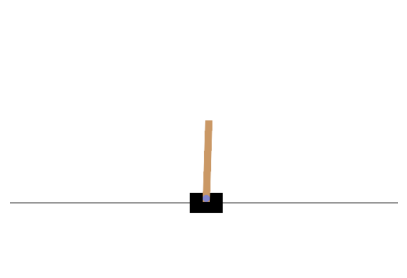

In [9]:
from matplotlib import pyplot as plt


def plot_environment(env, figsize=(5, 4)):
    plt.figure(figsize=figsize)
    img = env.render()
    plt.imshow(img)
    plt.axis("off")
    return img


plot_environment(env)
plt.show()

In [10]:
env.action_space

Discrete(2)

In [11]:
action = 1
obs, reward, done, truncated, info = env.step(action)
obs

array([ 0.02727336,  0.18847767,  0.03625453, -0.26141977], dtype=float32)

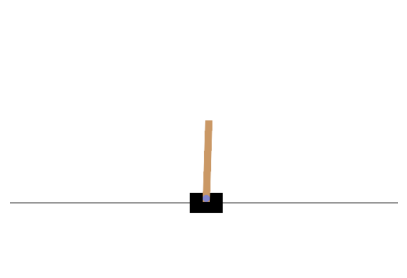

In [12]:
plot_environment(env)
plt.show()

In [13]:
reward

1.0

In [14]:
done

False

In [15]:
truncated

False

In [16]:
info

{}

In [17]:
if done or truncated:
    obs, info = env.reset()

In [18]:
def basic_policy(obs):
    angle = obs[2]
    return 0 if angle < 0 else 1


totals = []
for episode in range(500):
    episode_rewards = 0
    obs, info = env.reset(seed=episode)
    for step in range(200):
        action = basic_policy(obs)
        obs, reward, done, truncated, info = env.step(action)
        episode_rewards += reward
        if done or truncated:
            break
    totals.append(episode_rewards)

In [19]:
import numpy as np

np.mean(totals), np.std(totals), min(totals), max(totals)

(41.698, 8.389445512070509, 24.0, 63.0)

In [3]:
from sympy.physics.control.control_plots import matplotlib


def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,


def plot_animation(frames, repeat=False, interval=40):
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    anim = matplotlib.animation.FuncAnimation(
        fig, update_scene, fargs=(frames, patch),
        frames=len(frames), repeat=repeat, interval=interval)
    plt.close()
    return anim


def show_one_episode(policy, n_max_steps=200, seed=42):
    frames = []
    env = gym.make("CartPole-v1", render_mode="rgb_array")
    np.random.seed(seed)
    obs, info = env.reset(seed=seed)
    for step in range(n_max_steps):
        frames.append(env.render())
        action = policy(obs)
        obs, reward, done, truncated, info = env.step(action)
        if done or truncated:
            break
    env.close()
    return plot_animation(frames)


show_one_episode(basic_policy)

NameError: name 'basic_policy' is not defined

In [4]:
import tensorflow as tf

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

In [6]:
import gym


def pg_policy(obs):
    left_proba = model.predict(obs[np.newaxis], verbose=0)[0][0]
    return int(np.random.rand() > left_proba)


np.random.seed(42)
show_one_episode(pg_policy)

/opt/anaconda3/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [7]:
def play_one_step(env, obs, model, loss_fn):
    with tf.GradientTape() as tape:
        left_proba = model(obs[np.newaxis])
        action = (tf.random.uniform([1, 1]) > left_proba)
        y_target = tf.constant([[1.]]) - tf.cast(action, tf.float32)
        loss = tf.reduce_mean(loss_fn(y_target, left_proba))

    grads = tape.gradient(loss, model.trainable_variables)
    obs, reward, done, truncated, info = env.step(int(action))
    return obs, reward, done, truncated, grads

In [8]:
def play_multiple_episodes(env, n_episodes, n_max_steps, model, loss_fn):
    all_rewards = []
    all_grads = []
    for episode in range(n_episodes):
        current_rewards = []
        current_grads = []
        obs, info = env.reset()
        for step in range(n_max_steps):
            obs, reward, done, truncated, grads = play_one_step(env, obs, model, loss_fn)
            current_rewards.append(reward)
            current_grads.append(grads)
            if done or truncated:
                break

        all_rewards.append(current_rewards)
        all_grads.append(current_grads)

    return all_rewards, all_grads

In [9]:
def discount_rewards(rewards, discount_factor):
    discounted = np.array(rewards)
    for step in range(len(rewards) - 2, -1, -1):
        discounted[step] += discounted[step + 1] * discount_factor
    return discounted


def discount_and_normalize_rewards(all_rewards, discount_factor):
    all_discounted_rewards = [discount_rewards(rewards, discount_factor) for rewards in all_rewards]
    flat_rewards = np.concatenate(all_discounted_rewards)
    reward_mean = flat_rewards.mean()
    reward_std = flat_rewards.std()
    return [(discounted_rewards - reward_mean) / reward_std for discounted_rewards in all_discounted_rewards]

In [10]:
discount_rewards([10, 0, -50], discount_factor=0.8)

array([-22, -40, -50])

In [11]:
discount_and_normalize_rewards([[10, 0, -50], [10, 20]], discount_factor=0.8)

[array([-0.28435071, -0.86597718, -1.18910299]),
 array([1.26665318, 1.0727777 ])]

In [12]:
n_iterations = 75
n_episodes_per_update = 5
n_max_steps = 200
discount_factor = 0.95

In [13]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

obs, info = env.reset(seed=42)

NameError: name 'env' is not defined

In [14]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.01)
loss_fn = tf.keras.losses.binary_crossentropy

In [15]:
for iteration in range(n_iterations):
    all_rewards, all_grads = play_multiple_episodes(env, n_episodes_per_update, n_max_steps, model, loss_fn)
    total_rewards = sum(map(sum, all_rewards))
    print(f"\r반복: {iteration + 1}/{n_iterations},"
          f" 평균 보상: {total_rewards / n_episodes_per_update:.1f}", end="")

    all_final_rewards = discount_and_normalize_rewards(all_rewards, discount_factor)
    all_mean_grads = []
    for var_index in range(len(model.trainable_variables)):
        mean_grads = tf.reduce_mean(
            [final_reward * all_grads[episode_index][step][var_index]
             for episode_index, final_rewards in enumerate(all_final_rewards)
             for step, final_reward in enumerate(final_rewards)], axis=0)
        all_mean_grads.append(mean_grads)

    optimizer.apply_gradients(zip(all_mean_grads, model.trainable_variables))

NameError: name 'env' is not defined

In [16]:
np.random.seed(42)
show_one_episode(pg_policy)

In [17]:
np.random.seed(42)

transition_probabilities = [
    [0.7, 0.2, 0.0, 0.1],
    [0.0, 0.0, 0.9, 0.1],
    [0.0, 1.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 1.0]]

n_max_steps = 1000
terminal_states = [3]


def run_chain(start_state):
    current_state = start_state
    for step in range(n_max_steps):
        print(current_state, end=" ")
        if current_state in terminal_states:
            break
        current_state = np.random.choice(
            range(len(transition_probabilities)),
            p=transition_probabilities[current_state]
        )
    else:
        print("...", end="")

    print()


for idx in range(10):
    print(f"실행 #{idx + 1}: ", end="")
    run_chain(start_state=0)

실행 #1: 0 0 3 
실행 #2: 0 1 2 1 2 1 2 1 2 1 3 
실행 #3: 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3 
실행 #4: 0 3 
실행 #5: 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3 
실행 #6: 0 1 3 
실행 #7: 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3 
실행 #8: 0 0 0 1 2 1 2 1 3 
실행 #9: 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3 
실행 #10: 0 0 0 1 2 1 3 


In [18]:
transition_probabilities = [
    [[0.7, 0.3, 0.0], [1.0, 0.0, 0.0], [0.8, 0.2, 0.0]],
    [[0.0, 1.0, 0.0], None, [0.0, 0.0, 1.0]],
    [None, [0.8, 0.1, 0.1], None]
]
rewards = [
    [[+10, 0, 0], [0, 0, 0], [0, 0, 0]],
    [[0, 0, 0], [0, 0, 0], [0, 0, -50]],
    [[0, 0, 0], [+40, 0, 0], [0, 0, 0]]
]
possible_actions = [[0, 1, 2], [0, 2], [1]]

In [19]:
Q_values = np.full((3, 3), -np.inf)
for state, actions in enumerate(possible_actions):
    Q_values[state, actions] = 0.0

In [20]:
gamma = 0.90

history1 = []
for iteration in range(50):
    Q_prev = Q_values.copy()
    history1.append(Q_prev)
    for s in range(3):
        for a in possible_actions[s]:
            Q_values[s, a] = np.sum([
                transition_probabilities[s][a][sp]
                * (rewards[s][a][sp] + gamma * Q_prev[sp].max())
                for sp in range(3)])

history1 = np.array(history1)

In [21]:
Q_values

array([[18.91891892, 17.02702702, 13.62162162],
       [ 0.        ,        -inf, -4.87971488],
       [       -inf, 50.13365013,        -inf]])

In [22]:
Q_values.argmax(axis=1)

array([0, 0, 1])

In [23]:
def step(state, action):
    probas = transition_probabilities[state][action]
    next_state = np.random.choice([0, 1, 2], p=probas)
    reward = rewards[state][action][next_state]
    return next_state, reward

In [24]:
def exploration_policy(state):
    return np.random.choice(possible_actions[state])

In [25]:
np.random.seed(42)
Q_values = np.full((3, 3), -np.inf)
for state, actions in enumerate(possible_actions):
    Q_values[state][actions] = 0

In [26]:
alpha0 = 0.05
decay = 0.005
gamma = 0.90
state = 0
history2 = []

for iteration in range(10_000):
    history2.append(Q_values.copy())
    action = exploration_policy(state)
    next_state, reward = step(state, action)
    next_value = Q_values[next_state].max()
    alpha = alpha0 / (1 + iteration * decay)
    Q_values[state, action] *= 1 - alpha
    Q_values[state, action] += alpha * (reward + gamma * next_value)
    state = next_state

history2 = np.array(history2)

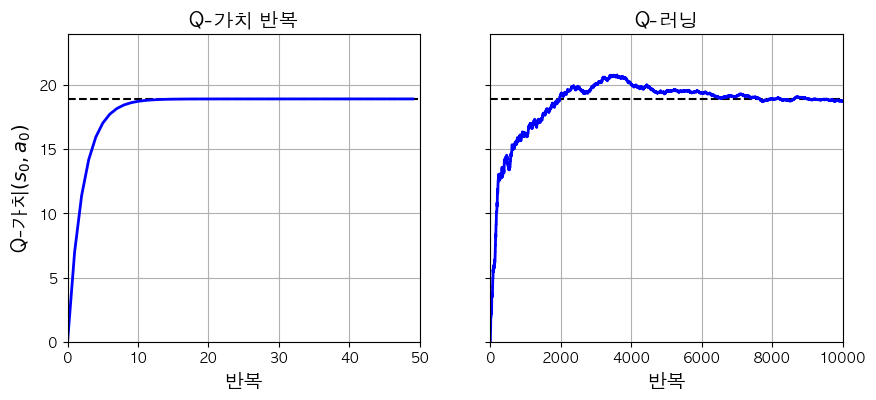

In [27]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

true_Q_value = history1[-1, 0, 0]

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
axes[0].set_ylabel("Q-가치$(s_0, a_0)$", fontsize=14)
axes[0].set_title("Q-가치 반복", fontsize=14)
axes[1].set_title("Q-러닝", fontsize=14)
for ax, width, history in zip(axes, (50, 10000), (history1, history2)):
    ax.plot([0, width], [true_Q_value, true_Q_value], "k--")
    ax.plot(np.arange(width), history[:, 0, 0], "b-", linewidth=2)
    ax.set_xlabel("반복", fontsize=14)
    ax.axis([0, width, 0, 24])
    ax.grid(True)

plt.show()

In [28]:
tf.random.set_seed(42)

input_shape = [4]
n_outputs = 2

model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation="elu", input_shape=input_shape),
    tf.keras.layers.Dense(32, activation="elu"),
    tf.keras.layers.Dense(n_outputs)
])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
def epsilon_greedy_policy(state, epsilon=0):
    if np.random.rand() < epsilon:
        return np.random.randint(n_outputs)
    else:
        Q_values = model.predict(state[np.newaxis], verbose=0)[0]
        return Q_values.argmax()

In [30]:
from collections import deque

replay_buffer = deque(maxlen=2000)

In [31]:
class ReplayBuffer:
    def __init__(self, max_size):
        self.buffer = np.empty(max_size, dtype=object)
        self.max_size = max_size
        self.index = 0
        self.size = 0

    def append(self, obj):
        self.buffer[self.index] = obj
        self.size = min(self.size + 1, self.max_size)
        self.index = (self.index + 1) % self.max_size

    def sample(self, batch_size):
        indices = np.random.randint(self.size, size=batch_size)
        return self.buffer[indices]

In [32]:
def sample_experiences(batch_size):
    indices = np.random.randint(len(replay_buffer), size=batch_size)
    batch = [replay_buffer[index] for index in indices]
    return [
        np.array([experience[field_index] for experience in batch])
        for field_index in range(6)
    ]

In [33]:
def play_one_step(env, state, epsilon):
    action = epsilon_greedy_policy(state, epsilon)
    next_state, reward, done, truncated, info = env.step(action)
    replay_buffer.append((state, action, reward, next_state, done, truncated))
    return next_state, reward, done, truncated, info

In [34]:
env.reset(seed=42)
np.random.seed(42)
tf.random.set_seed(42)
rewards = []
best_score = 0

NameError: name 'env' is not defined

In [35]:
batch_size = 32
discount_factor = 0.95
optimizer = tf.keras.optimizers.Nadam(learning_rate=1e-2)
loss_fn = tf.keras.losses.mean_squared_error


def training_step(batch_size):
    experiences = sample_experiences(batch_size)
    states, actions, rewards, next_states, dones, truncateds = experiences
    next_Q_values = model.predict(next_states, verbose=0)
    max_next_Q_values = next_Q_values.max(axis=1)
    runs = 1.0 - (dones | truncateds)
    target_Q_values = rewards + runs * discount_factor * max_next_Q_values
    target_Q_values = target_Q_values.reshape(-1, 1)
    mask = tf.one_hot(actions, n_outputs)
    with tf.GradientTape() as tape:
        all_Q_values = model(states)
        Q_values = tf.reduce_sum(all_Q_values * mask, axis=1, keepdims=True)
        loss = tf.reduce_mean(loss_fn(target_Q_values, Q_values))

    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

In [36]:
for episode in range(300):
    obs, info = env.reset()
    for step in range(200):
        epsilon = max(1 - episode / 500, 0.01)
        obs, reward, done, truncated, info = play_one_step(env, obs, epsilon)
        if done or truncated:
            break

    print(f"\r에피소드: {episode + 1}, 스텝: {step + 1}, eps: {epsilon:.3f}", end="")
    rewards.append(step)
    if step >= best_score:
        best_weights = model.get_weights()
        best_score = step

    if episode > 50:
        training_step(batch_size)

model.set_weights(best_weights)

NameError: name 'env' is not defined

ValueError: x and y can be no greater than 2D, but have shapes (3,) and (3, 3, 3)

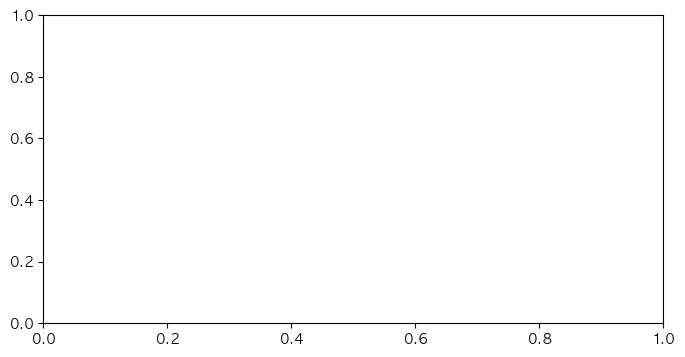

In [37]:
plt.figure(figsize=(8, 4))
plt.plot(rewards)
plt.xlabel("에피소드", fontsize=14)
plt.ylabel("보상의 합", fontsize=14)
plt.grid(True)
plt.show()

In [38]:
show_one_episode(epsilon_greedy_policy)

/opt/anaconda3/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [39]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation="elu", input_shape=input_shape),
    tf.keras.layers.Dense(32, activation="elu"),
    tf.keras.layers.Dense(n_outputs)
])

In [40]:
target = tf.keras.models.clone_model(model)
target.set_weights(model.get_weights())

In [41]:
env.reset(seed=42)
np.random.seed(42)
tf.random.set_seed(42)
rewards = []
best_score = 0

batch_size = 32
discount_factor = 0.95
optimizer = tf.keras.optimizers.Nadam(learning_rate=1e-2)
loss_fn = tf.keras.losses.mean_squared_error

replay_buffer = deque(maxlen=2000)


def training_step(batch_size):
    experiences = sample_experiences(batch_size)
    states, actions, rewards, next_states, dones, truncateds = experiences
    next_Q_values = target.predict(next_states, verbose=0)
    max_next_Q_values = next_Q_values.max(axis=1)
    runs = 1.0 - (dones | truncateds)
    target_Q_values = rewards + runs * discount_factor * max_next_Q_values
    target_Q_values = target_Q_values.reshape(-1, 1)
    mask = tf.one_hot(actions, n_outputs)
    with tf.GradientTape() as tape:
        all_Q_values = model(states)
        Q_values = tf.reduce_sum(all_Q_values * mask, axis=1, keepdims=True)
        loss = tf.reduce_mean(loss_fn(target_Q_values, Q_values))

    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

NameError: name 'env' is not defined

In [42]:
for episode in range(300):
    obs, info = env.reset()
    for step in range(200):
        epsilon = max(1 - episode / 500, 0.01)
        obs, reward, done, info, truncated = play_one_step(env, obs, epsilon)
        if done or truncated:
            break

    print(f"\r에피소드: {episode + 1}, 스텝: {step + 1}, eps: {epsilon:.3f}", end="")
    rewards.append(step)
    if step >= best_score:
        best_weights = model.get_weights()
        best_score = step

    if episode > 50:
        training_step(batch_size)
        if episode % 50 == 0:
            target.set_weights(model.get_weights())

model.set_weights(best_weights)

NameError: name 'env' is not defined

ValueError: x and y can be no greater than 2D, but have shapes (3,) and (3, 3, 3)

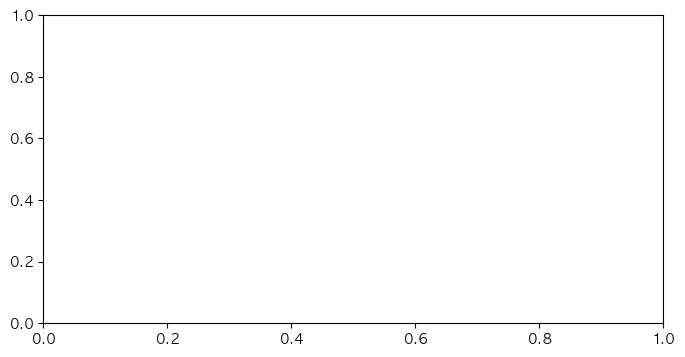

In [43]:
plt.figure(figsize=(8, 4))
plt.plot(rewards)
plt.xlabel("에피소드", fontsize=14)
plt.ylabel("보상의 합", fontsize=14)
plt.grid(True)
plt.show()

In [44]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation="elu", input_shape=input_shape),
    tf.keras.layers.Dense(32, activation="elu"),
    tf.keras.layers.Dense(n_outputs)
])

target = tf.keras.models.clone_model(model)
target.set_weights(model.get_weights())

env.reset(seed=42)
np.random.seed(42)
tf.random.set_seed(42)
rewards = []
best_score = 0

batch_size = 32
discount_factor = 0.95
optimizer = tf.keras.optimizers.Nadam(learning_rate=1e-2)
loss_fn = tf.keras.losses.mean_squared_error


def training_step(batch_size):
    experiences = sample_experiences(batch_size)
    states, actions, rewards, next_states, dones, truncateds = experiences
    next_Q_values = model.predict(next_states, verbose=0)
    best_next_actions = next_Q_values.argmax(axis=1)
    next_mask = tf.one_hot(best_next_actions, n_outputs).numpy()
    max_next_Q_values = (target.predict(next_states, verbose=0) * next_mask).sum(axis=1)

    runs = 1.0 - (dones | truncateds)
    target_Q_values = rewards + runs * discount_factor * max_next_Q_values
    target_Q_values = target_Q_values.reshape(-1, 1)
    mask = tf.one_hot(actions, n_outputs)
    with tf.GradientTape() as tape:
        all_Q_values = model(states)
        Q_values = tf.reduce_sum(all_Q_values * mask, axis=1, keepdims=True)
        loss = tf.reduce_mean(loss_fn(target_Q_values, Q_values))

    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))


replay_buffer = deque(maxlen=2000)

for episode in range(300):
    obs, info = env.reset()
    for step in range(200):
        epsilon = max(1 - episode / 500, 0.01)
        obs, reward, done, info, truncated = play_one_step(env, obs, epsilon)
        if done or truncated:
            break

    print(f"\r에피소드: {episode + 1}, 스텝: {step + 1}, eps: {epsilon:.3f}", end="")
    rewards.append(step)
    if step >= best_score:
        best_weights = model.get_weights()
        best_score = step

    if episode > 50:
        training_step(batch_size)
        if episode % 50 == 0:
            target.set_weights(model.get_weights())

model.set_weights(best_weights)

NameError: name 'env' is not defined

ValueError: x and y can be no greater than 2D, but have shapes (3,) and (3, 3, 3)

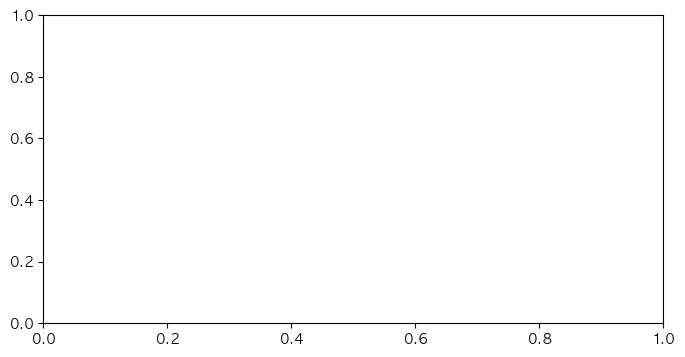

In [45]:
plt.figure(figsize=(8, 4))
plt.plot(rewards)
plt.xlabel("에피소드", fontsize=14)
plt.ylabel("보상의 합", fontsize=14)
plt.grid(True)
plt.show()

In [46]:
tf.random.set_seed(42)

input_states = tf.keras.layers.Input(shape=[4])
hidden1 = tf.keras.layers.Dense(32, activation="elu")(input_states)
hidden2 = tf.keras.layers.Dense(32, activation="elu")(hidden1)
state_values = tf.keras.layers.Dense(1)(hidden2)
raw_advantages = tf.keras.layers.Dense(n_outputs)(hidden2)
advantages = raw_advantages - tf.reduce_max(raw_advantages, axis=1, keepdims=True)
Q_values = state_values + advantages
model = tf.keras.Model(inputs=[input_states], outputs=[Q_values])

ValueError: A KerasTensor cannot be used as input to a TensorFlow function. A KerasTensor is a symbolic placeholder for a shape and dtype, used when constructing Keras Functional models or Keras Functions. You can only use it as input to a Keras layer or a Keras operation (from the namespaces `keras.layers` and `keras.operations`). You are likely doing something like:

```
x = Input(...)
...
tf_fn(x)  # Invalid.
```

What you should do instead is wrap `tf_fn` in a layer:

```
class MyLayer(Layer):
    def call(self, x):
        return tf_fn(x)

x = MyLayer()(x)
```


In [47]:
batch_size = 32
discount_factor = 0.95
optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-3)
loss_fn = tf.keras.losses.mean_squared_error

target = tf.keras.models.clone_model(model)
target.set_weights(model.get_weights())

env.reset(seed=42)
replay_buffer = deque(maxlen=2000)
rewards = []
best_score = 0

for episode in range(300):
    obs, info = env.reset()
    for step in range(200):
        epsilon = max(1 - episode / 500, 0.01)
        obs, reward, done, info, truncated = play_one_step(env, obs, epsilon)
        if done or truncated:
            break

    print(f"\r에피소드: {episode + 1}, 스텝: {step + 1}, eps: {epsilon:.3f}", end="")
    rewards.append(step)
    if step >= best_score:
        best_weights = model.get_weights()
        best_score = step

    if episode > 50:
        training_step(batch_size)
        if episode % 50 == 0:
            target.set_weights(model.get_weights())

model.set_weights(best_weights)

NameError: name 'env' is not defined

ValueError: x and y can be no greater than 2D, but have shapes (3,) and (3, 3, 3)

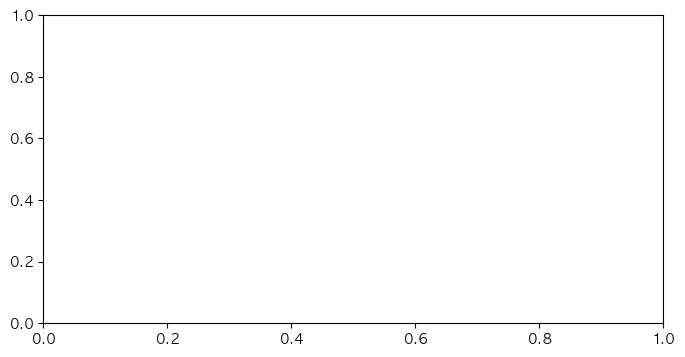

In [48]:
plt.figure(figsize=(8, 4))
plt.plot(rewards)
plt.xlabel("에피소드", fontsize=14)
plt.ylabel("보상의 합", fontsize=14)
plt.grid(True)
plt.show()

In [49]:
env.close()

NameError: name 'env' is not defined